In [1]:
using InMemoryDatasets, StatisticalGraphics, DLMReader

Passing `group` will trigger the grouped bar chart.

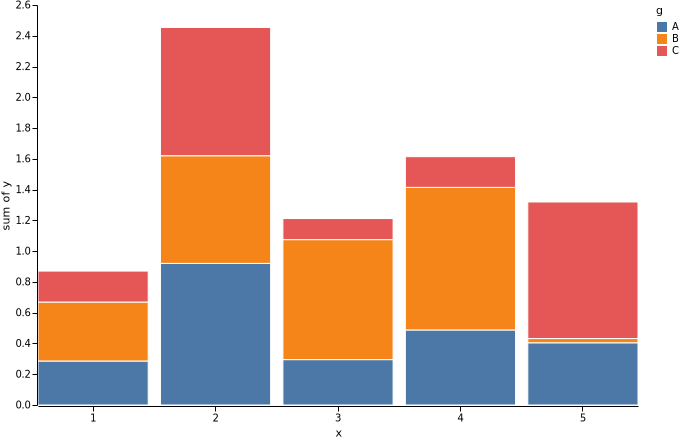

In [2]:
ds = Dataset(x=repeat(1:5, inner=3), y=rand(15), g=repeat('A':'C', outer=5))

sgplot(ds, Bar(x=:x, response=:y, group=:g))

By default the grouped are stacked, however, passing `groupdisplay` changes this default behaviour. `Bar` supports `:stack`, `:cluster`, `:step`, and `:none` as the value for `groupdisplay`

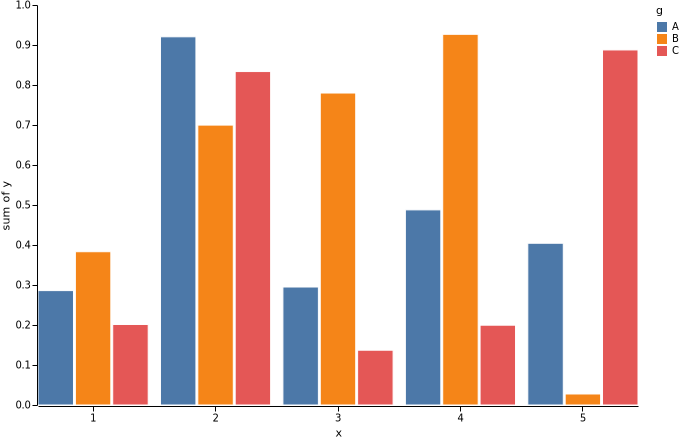

In [3]:
sgplot(ds, Bar(x=:x, response=:y, group=:g, groupdisplay=:cluster))

Combining `barwidth=:nest` and `groupdisplay=:none` will produce a nested bar chart. In the following example we use a color scheme to color bars.

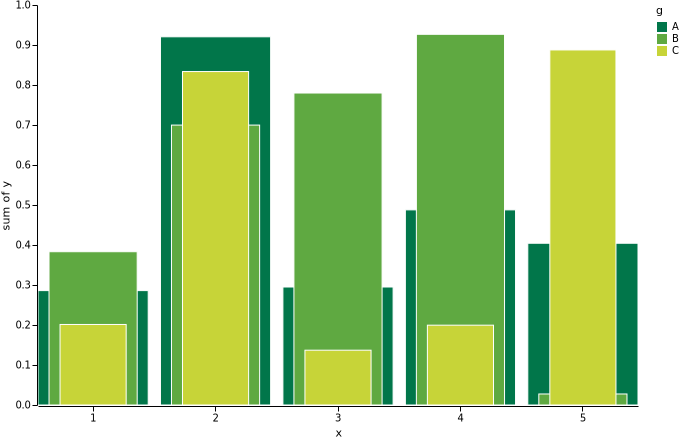

In [4]:
sgplot(ds, Bar(x=:x, response=:y, group=:g,
                         groupdisplay=:none, barwidth=:nest),
                            groupcolormodel=Dict(:scheme=>:darkgreen))

Using generated data

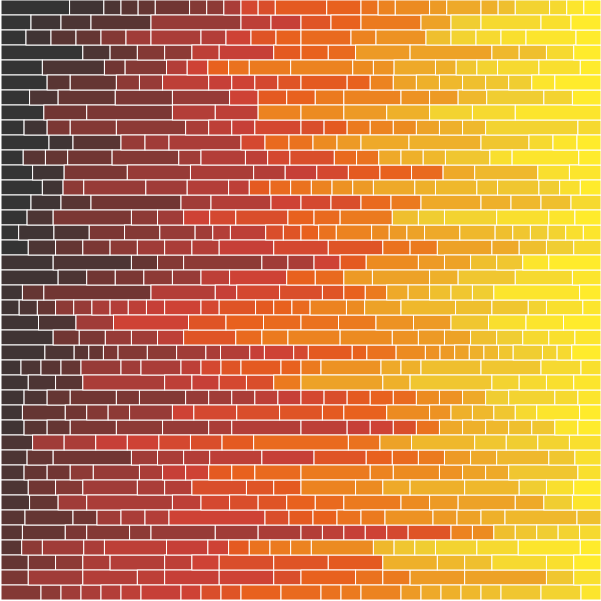

In [5]:
ds = Dataset(rand(1:40, 1000, 2), :auto)

sgplot(ds, Bar(y=:x1, group=:x2, normalize=true, space=0),
                groupcolormodel=:scheme=>:darkred,
                xaxis=Axis(nice=false, show=false),
                yaxis=Axis(show=false),
                height=600,
                legend=false,

                )

**[Revenue by Music Format, 1973–2018](https://observablehq.com/@mbostock/revenue-by-music-format-1973-2018)**

Reproducing an example from the [`D3`](http://d3js.org)`s examples collection.

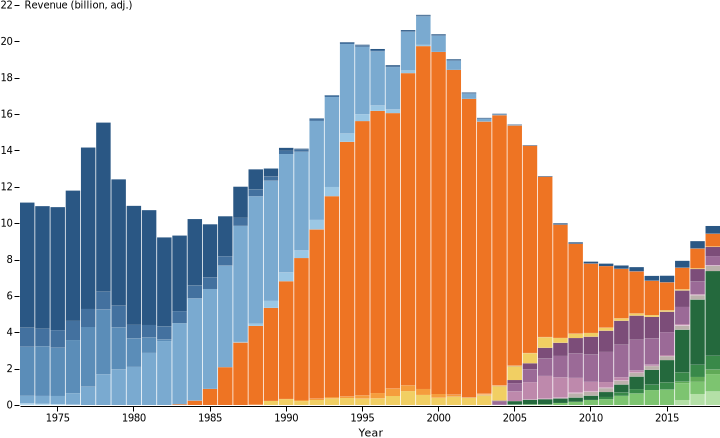

In [6]:
music = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "music.csv"))
color_ds = filereader(joinpath(dirname(pathof(StatisticalGraphics)),
                                 "..", "docs", "assets", "color_ds.csv"))
leftjoin!(music, color_ds, on = :Format)# sort data - original example
sort!(music, [:Year, :order], rev = [false, true]) # rev = true for :order to make the color similar to the original example

inbillion(x) = x/10^9 # make the yaxis' values in billion $
setformat!(music, r"Infla" => inbillion)

sgplot(
        music,
        [
          Bar(x = :Year, response = r"Infla",
              group = :Format,
              grouporder = :data,
              outlinethickness = 0,
              space = 0.05
            )
        ],
        groupcolormodel = reverse!(color_ds[:, :Color]),
        yaxis = Axis(title = "Revenue (billion, adj.)", domain = false, titlepos=[5,5], titleangle=0, titlealign=:left, titlesize=10),
        xaxis = Axis(values = 1975:5:2015),
        legend=false,
        width = 700
      )

Users can pass `normalize=true` to normalise a stacked bar chart.

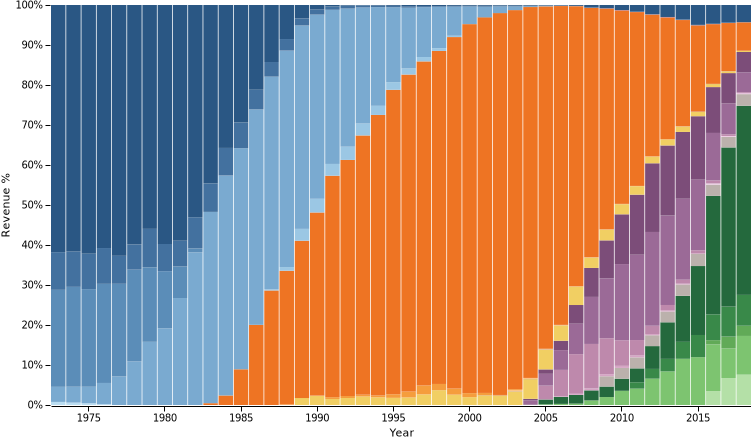

In [7]:
sgplot(
        music,
        Bar(x=:Year, response=r"Infla",
            group=:Format,
            grouporder=:data,
            outlinethickness=0,
            space=0.05,
            normalize=true,
          ),
        groupcolormodel=reverse!(color_ds[:, :Color]),
        yaxis=Axis(title="Revenue %", domain=false, nice=false, d3format = "%"),
        xaxis=Axis(values=1975:5:2015),
        legend=false,
        width=700
)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*